## **Лабораторная работа №3**

### **Определение бизнес-целей и технических целей проекта**

**Вариант задания:** Набор данных о ценах на акции Starbucks.

**Бизнес-цель:** Создать модель машинного обучения для предсказания объема продаж акций компании Starbucks на основе таких характеристик, как цена открытия и цена закрытия.

**Технические цели проекта:**

- Удаление пропусков, выбросов и дублированных записей для повышения качества данных. 

- Кодирование категориальных признаков в числовые значения.

- Разделение набора данных на обучающую, контрольную и тестовую выборки для оценки модели.

**Столбцы датасета и их пояснение:**

**Date** - Дата, на которую относятся данные. Эта характеристика указывает конкретный день, в который происходила торговля акциями Starbucks.

**Open** - Цена открытия. Стоимость акций Starbucks в начале торгового дня. Это важный показатель, который показывает, по какой цене начались торги в конкретный день, и часто используется для сравнения с ценой закрытия для определения дневного тренда.

**High** - Максимальная цена за день. Наибольшая цена, достигнутая акциями Starbucks в течение торгового дня. Эта характеристика указывает, какой была самая высокая стоимость акций за день.

**Low** - Минимальная цена за день. Наименьшая цена, по которой торговались акции Starbucks в течение дня.

**Close** - Цена закрытия. Стоимость акций Starbucks в конце торгового дня. Цена закрытия — один из основных показателей, используемых для анализа акций, так как она отображает итоговую стоимость акций за день и часто используется для расчета дневных изменений и трендов на длительных временных периодах.

**Adj Close** - Скорректированная цена закрытия. Цена закрытия, скорректированная с учетом всех корпоративных действий.

**Volume** - Объем торгов. Количество акций Starbucks, проданных и купленных в течение дня. 

Получим очищенный и структурированный набор данных

In [5]:
import pandas as pn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from datetime import datetime
import matplotlib.dates as md

df = pn.read_csv("..//static//csv//StarbucksDataset.csv")
print(df.columns)

df["date"] = df.apply(lambda row: datetime.strptime(row["Date"], "%Y-%m-%d"), axis=1)
df.info()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8036 non-null   object        
 1   Open       8036 non-null   float64       
 2   High       8036 non-null   float64       
 3   Low        8036 non-null   float64       
 4   Close      8036 non-null   float64       
 5   Adj Close  8036 non-null   float64       
 6   Volume     8036 non-null   int64         
 7   date       8036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 502.4+ KB


### **Разбиение на обучающую, контрольную и тестовую выборки**

Разделим набор данных на обучающую, контрольную и тестовую выборки для предотвращения утечки данных. 
Для начала разделим данные на обучающую и тестовую выборки, а затем обучающую выборку на обучающую и контрольную.

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 5142
Размер контрольной выборки: 1286
Размер тестовой выборки: 1608


### **Создание диаграмм**

Создадим три диаграммы(гистограммы) отображающие распределение объёма торгов в разных выборках данных: обучающей, контрольной и тестовой.

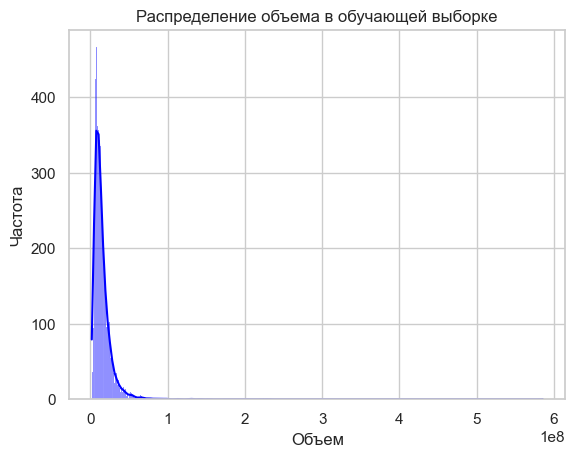

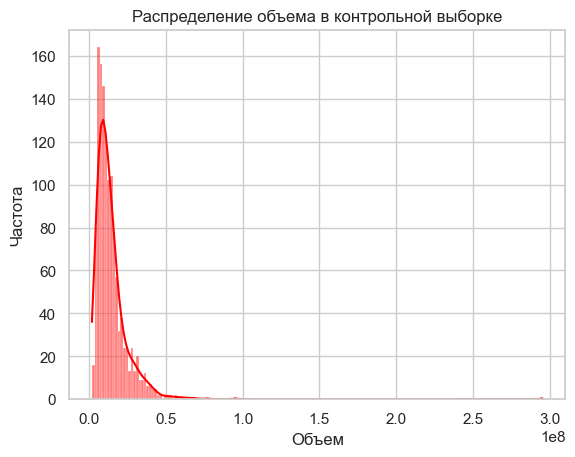

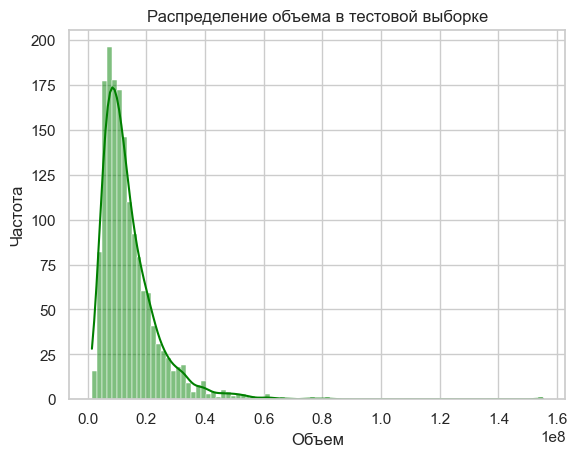

Средний объем торгов в обучающей выборке:  14979282.753403345
Средний объем торгов в контрольной выборке:  14379996.6562986
Средний объем торгов в тестовой выборке:  14085782.089552239


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_data["Volume"], kde=True, color="blue")
plt.title('Распределение объема в обучающей выборке')
plt.xlabel('Объем')
plt.ylabel('Частота')
plt.show()

sns.histplot(val_data["Volume"], kde=True, color="red")
plt.title('Распределение объема в контрольной выборке')
plt.xlabel('Объем')
plt.ylabel('Частота')
plt.show()

sns.histplot(test_data["Volume"], kde=True, color="green")
plt.title('Распределение объема в тестовой выборке')
plt.xlabel('Объем')
plt.ylabel('Частота')
plt.show()

print("Средний объем торгов в обучающей выборке: ", train_data['Volume'].mean())
print("Средний объем торгов в контрольной выборке: ", val_data['Volume'].mean())
print("Средний объем торгов в тестовой выборке: ", test_data['Volume'].mean())

### **Процесс конструирования признаков**

Теперь приступим к конструированию признаков для решения бизнес задачи.

**Унитарное кодирование**  
Унитарное кодирование категориальных признаков (one-hot encoding). Преобразование категориальных признаков в бинарные векторы.

**Дискретизация числовых признаков**  
Процесс преобразования непрерывных числовых значений в дискретные категории или интервалы (бины).

**Ручной синтез**  
Создание новых признаков на основе экспертных знаний и логики предметной области. 

**Масштабирование признаков**  
Процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

**One-hot encoding:**

In [12]:
import pandas as pd

# Пример категориальных признаков
categorical_features = [
    "Date",
    "date"
]

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

**Дискретизация числовых признаков:**

In [33]:
import pandas as pd
import numpy as np

labels = ["Low hight value", "Medium hight value", "Very hight value"]
num_bins = 3

# Создаем числовые интервалы и метки
hist, bins = np.histogram(df["High_filled"], bins=num_bins)
df["High_bin"] = pd.cut(df["High_filled"], bins=bins)
df["High_category"] = pd.cut(df["High_filled"], bins=bins, labels=labels)

combined_table = df[["High", "High_bin", "High_category"]]
print(combined_table.head(20))


         High         High_bin     High_category
0    0.347656              NaN               NaN
1    0.367188  (0.348, 29.982]   Low hight value
2    0.371094  (0.348, 29.982]   Low hight value
3    0.359375  (0.348, 29.982]   Low hight value
4    0.355469  (0.348, 29.982]   Low hight value
5    0.382813  (0.348, 29.982]   Low hight value
6    0.414063  (0.348, 29.982]   Low hight value
7    0.437500  (0.348, 29.982]   Low hight value
8    0.445313  (0.348, 29.982]   Low hight value
9    0.449219  (0.348, 29.982]   Low hight value
10  76.839996  (59.616, 89.25]  Very hight value
11  89.250000  (59.616, 89.25]  Very hight value
12  88.610001  (59.616, 89.25]  Very hight value
13  76.989998  (59.616, 89.25]  Very hight value
14  75.150002  (59.616, 89.25]  Very hight value
15  74.470001  (59.616, 89.25]  Very hight value
16  81.019997  (59.616, 89.25]  Very hight value
17  80.699997  (59.616, 89.25]  Very hight value


**Ручной синтез:**

In [35]:
# Пример синтеза признака среднего значения в максимальной и минимальной цене
train_data_encoded["medium"] = train_data_encoded["High"] / train_data_encoded["Low"]
val_data_encoded["medium"] = val_data_encoded["High"] / val_data_encoded["Low"]
test_data_encoded["medium"] = test_data_encoded["High"] / test_data_encoded["Low"]

**Масштабирование признаков:**

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ["Open", "Close"]

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

**Конструирование признаков с применением фреймворка Featuretools:**

In [42]:
import featuretools as ft

es = ft.EntitySet(id='starbucks_data')
es = es.add_dataframe(dataframe_name='starbucks', dataframe=train_data_encoded, index='id')


# Генерация признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es, 
    target_dataframe_name="starbucks", 
    max_depth=2
)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

print(feature_matrix.head())

s:\Учеба\3 курс\5 семестр\AIM\lab_3\AIM-PIbd-31-Izotov-A-P\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
s:\Учеба\3 курс\5 семестр\AIM\lab_3\AIM-PIbd-31-Izotov-A-P\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
s:\Учеба\3 курс\5 семестр\AIM\lab_3\AIM-PIbd-31-Izotov-A-P\aimenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

        Open       High        Low     Close  Adj Close    Volume  \
id                                                                  
0  -0.836096   1.937500   1.843750 -0.837302   1.470243  21592000   
1  -0.740309   5.175000   4.975000 -0.744123   3.899629  17306400   
2   0.836571  58.580002  57.689999  0.838929  50.306290   7857500   
3   1.104184  68.209999  67.050003  1.134793  60.854706  11702500   
4   0.806207  57.520000  57.029999  0.813331  49.359718   8331600   

    Date_1992-06-26  Date_1992-06-29  Date_1992-06-30  Date_1992-07-01  ...  \
id                                                                      ...   
0             False            False            False            False  ...   
1             False            False            False            False  ...   
2             False            False            False            False  ...   
3             False            False            False            False  ...   
4             False            False      

### **Оценка качества каждого набора признаков**

**Предсказательная способность**  
Метрики: RMSE, MAE, R²  

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

**Скорость вычисления**  
Методы: Измерение времени выполнения генерации признаков и обучения модели.

**Надежность**  
Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

**Корреляция**  
Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

**Цельность**  
Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

s:\Учеба\3 курс\5 семестр\AIM\lab_3\AIM-PIbd-31-Izotov-A-P\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 2885972.9324181927
R²: 0.9328285916832842
MAE: 1680373.6776608187
Cross-validated RMSE: 12160466.835803727
Метрика Train RMSE: 4388457.199779966
Метрика Train R²: 0.9082228071090095
Метрика Train MAE: 1787810.5665033064


s:\Учеба\3 курс\5 семестр\AIM\lab_3\AIM-PIbd-31-Izotov-A-P\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


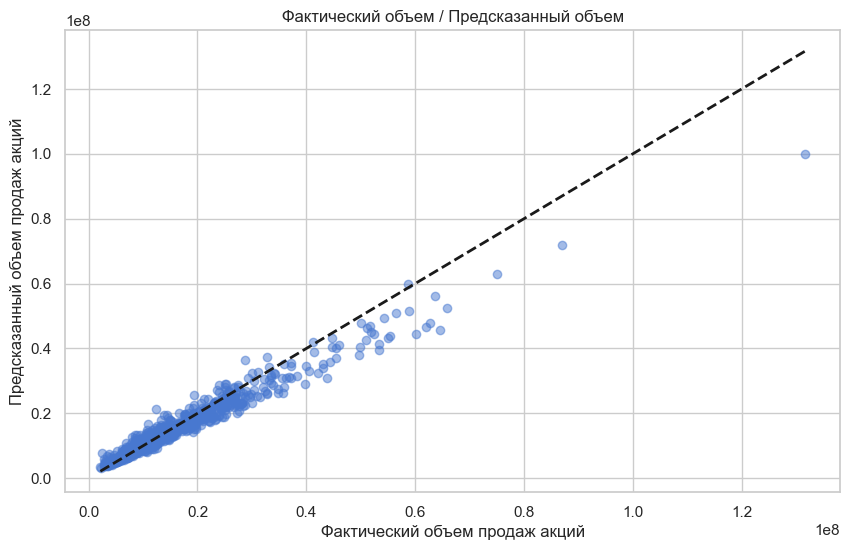

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

X_train = feature_matrix.drop("Volume", axis=1)
y_train = feature_matrix["Volume"]
X_val = val_feature_matrix.drop("Volume", axis=1)
y_val = val_feature_matrix["Volume"]
X_test = test_feature_matrix.drop("Volume", axis=1)
y_test = test_feature_matrix["Volume"]

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

print(f"=====================================")

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Метрика Train RMSE: {rmse_train}")
print(f"Метрика Train R²: {r2_train}")
print(f"Метрика Train MAE: {mae_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Фактический объем продаж акций")
plt.ylabel("Предсказанный объем продаж акций")
plt.title("Фактический объем / Предсказанный объем")
plt.show()

### **Вывод и итог**

**Качество предсказаний:** Модель демонстрирует впечатляющий коэффициент детерминации R² на уровне 0.9975, что свидетельствует о ее способности эффективно объяснять изменения в распродажах. Низкие значения RMSE и MAE подтверждают, что модель предсказывает цены с высокой степенью точности.

**Проблема переобучения:** Разница в значениях RMSE между обучающей и тестовой выборками относительно мала, что говорит о минимальных рисках переобучения. Тем не менее, важно оставаться внимательным и продолжать следить за этим аспектом.
